In [1]:
import pandas as pd 

df = pd.read_csv(r'C:\Users\Cliff Chen\Downloads\amazon_order_history_2020.csv')
df.head()



,order id,items,to,date,total,postage,gift,VAT,GST,PST,refund,payments
0,702-5106998-1399415,"Rankie HDMI to DVI Cable, CL3 Rated High Speed...",Cliff Chen,5/11/2020,CDN$ 17.99,CDN$ 0.00,0,CDN$ 17.99,0,CDN$ 0.00,0,"Visa ending in 4882: May 13, 2020: CDN$ 17.99;"
1,702-3703528-1706610,iPad Mini 1/2/3 Case - 360 Degree Rotating Sta...,Cliff Chen,5/4/2020,CDN$ 46.98,CDN$ 7.85,0,CDN$ 46.98,0,CDN$ 0.00,0,"Visa ending in 4882: May 6, 2020: CDN$ 46.98;"
2,D01-4724051-2701028,Audible Gold 1-Month Free-Trial Membership ASIN;,0,3/16/2020,CDN$ 0.00,0,0,0,0,0,0,2020-03-16: CDN$ 0.00;
3,701-0134839-6181841,"Olanly Original Durable Striped Door Mat, Indo...",Cliff Chen,9/1/2020,CDN$ 29.99,CDN$ 0.00,0,CDN$ 29.99,0,CDN$ 0.00,0,"Visa ending in 4705: September 2, 2020: CDN$ 2..."
4,701-7687153-7251463,"Diane Ionic DBC043 Anti-Static Rat Tail Comb, ...",Cliff Chen,9/1/2020,CDN$ 63.28,CDN$ 0.00,0,CDN$ 59.74,0,CDN$ 1.75,CDN$ 31.74,"Visa ending in 4705: September 4, 2020: CDN$ 1..."


In [2]:
df['total'] = df['total'].str.replace('CDN', '')
df['total'] = df['total'].str.replace('$', '').astype(float)
df.head()



,order id,items,to,date,total,postage,gift,VAT,GST,PST,refund,payments
0,702-5106998-1399415,"Rankie HDMI to DVI Cable, CL3 Rated High Speed...",Cliff Chen,5/11/2020,17.99,CDN$ 0.00,0,CDN$ 17.99,0,CDN$ 0.00,0,"Visa ending in 4882: May 13, 2020: CDN$ 17.99;"
1,702-3703528-1706610,iPad Mini 1/2/3 Case - 360 Degree Rotating Sta...,Cliff Chen,5/4/2020,46.98,CDN$ 7.85,0,CDN$ 46.98,0,CDN$ 0.00,0,"Visa ending in 4882: May 6, 2020: CDN$ 46.98;"
2,D01-4724051-2701028,Audible Gold 1-Month Free-Trial Membership ASIN;,0,3/16/2020,0.00,0,0,0,0,0,0,2020-03-16: CDN$ 0.00;
3,701-0134839-6181841,"Olanly Original Durable Striped Door Mat, Indo...",Cliff Chen,9/1/2020,29.99,CDN$ 0.00,0,CDN$ 29.99,0,CDN$ 0.00,0,"Visa ending in 4705: September 2, 2020: CDN$ 2..."
4,701-7687153-7251463,"Diane Ionic DBC043 Anti-Static Rat Tail Comb, ...",Cliff Chen,9/1/2020,63.28,CDN$ 0.00,0,CDN$ 59.74,0,CDN$ 1.75,CDN$ 31.74,"Visa ending in 4705: September 4, 2020: CDN$ 1..."


In [3]:
df["total"].dtype

dtype('float64')

In [4]:
tot = df["total"].sum()

In [5]:
print(f"Total I have Spent in 2020: $" + "%.2f" %tot)

Total I have Spent in 2020: $1316.18


In [6]:
avg = df["total"].mean()
print(f"Average I spend per order: $" + "%.2f" %avg)

Average I spend per order: $39.88


In [7]:
med = df["total"].median()
print(f"Median of orders: $" + "%.2f" %med)

Median of orders: $30.04


In [8]:
df["date"] = pd.to_datetime(df["date"])
df.head()

,order id,items,to,date,total,postage,gift,VAT,GST,PST,refund,payments
0,702-5106998-1399415,"Rankie HDMI to DVI Cable, CL3 Rated High Speed...",Cliff Chen,2020-05-11,17.99,CDN$ 0.00,0,CDN$ 17.99,0,CDN$ 0.00,0,"Visa ending in 4882: May 13, 2020: CDN$ 17.99;"
1,702-3703528-1706610,iPad Mini 1/2/3 Case - 360 Degree Rotating Sta...,Cliff Chen,2020-05-04,46.98,CDN$ 7.85,0,CDN$ 46.98,0,CDN$ 0.00,0,"Visa ending in 4882: May 6, 2020: CDN$ 46.98;"
2,D01-4724051-2701028,Audible Gold 1-Month Free-Trial Membership ASIN;,0,2020-03-16,0.00,0,0,0,0,0,0,2020-03-16: CDN$ 0.00;
3,701-0134839-6181841,"Olanly Original Durable Striped Door Mat, Indo...",Cliff Chen,2020-09-01,29.99,CDN$ 0.00,0,CDN$ 29.99,0,CDN$ 0.00,0,"Visa ending in 4705: September 2, 2020: CDN$ 2..."
4,701-7687153-7251463,"Diane Ionic DBC043 Anti-Static Rat Tail Comb, ...",Cliff Chen,2020-09-01,63.28,CDN$ 0.00,0,CDN$ 59.74,0,CDN$ 1.75,CDN$ 31.74,"Visa ending in 4705: September 4, 2020: CDN$ 1..."


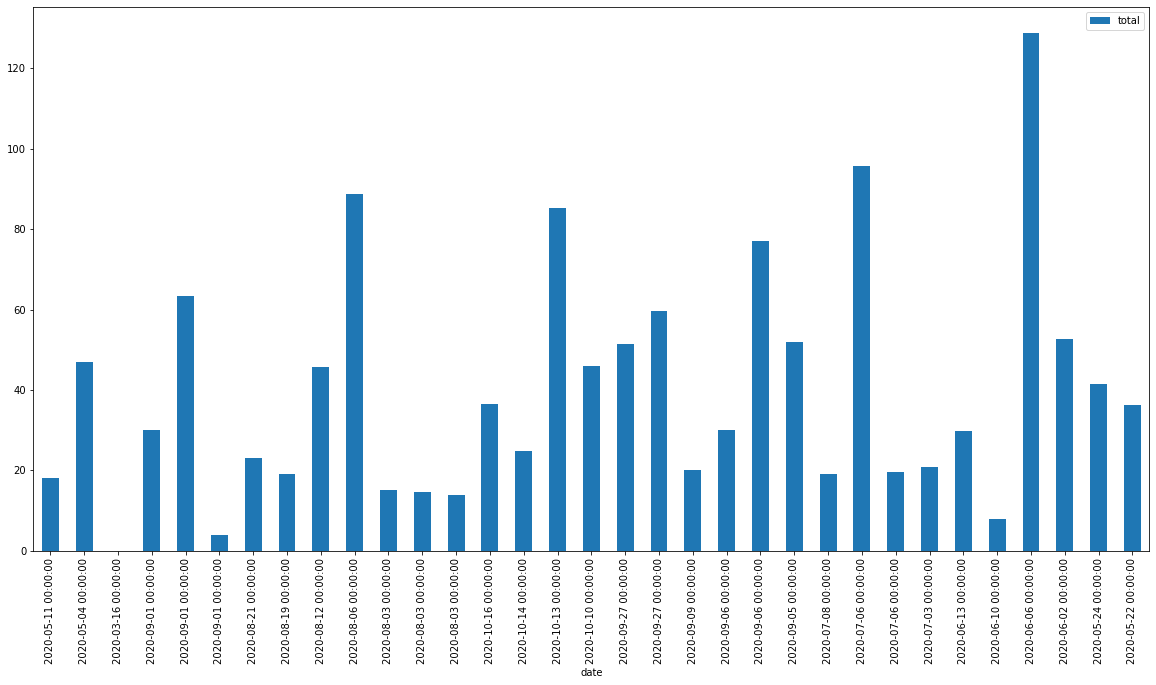

In [9]:
%matplotlib inline 
df.plot.bar(x="date", y="total", rot = 90, figsize = (20,10))

In [10]:
day_orders = df.groupby("date").sum()["total"]

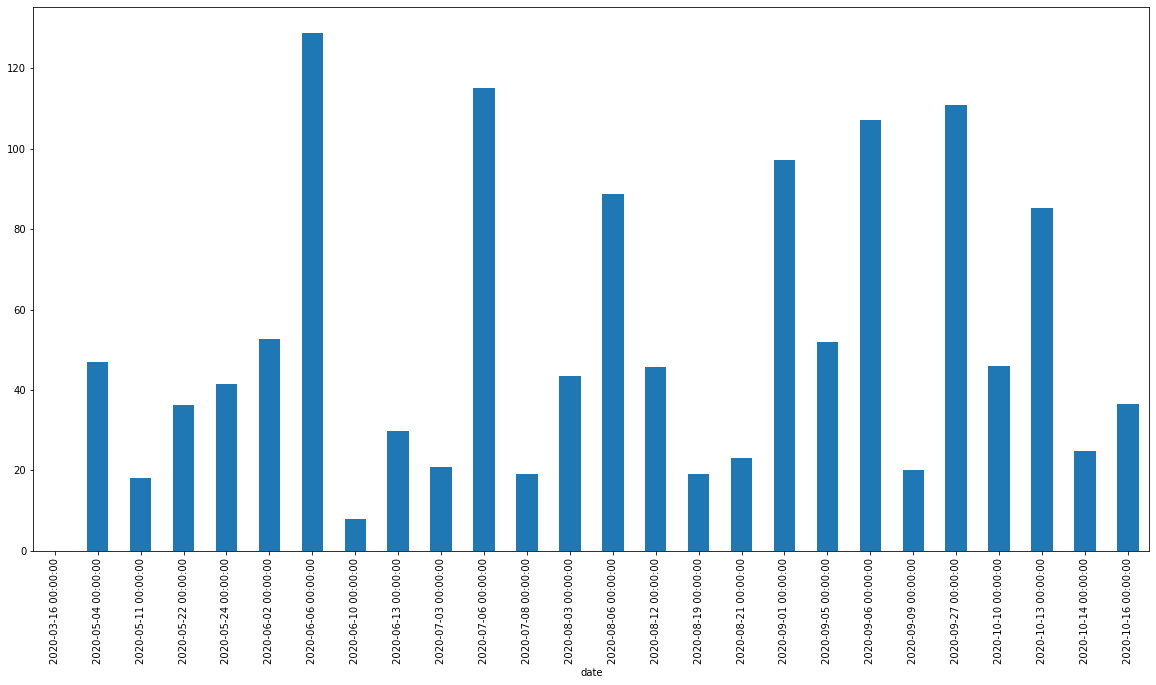

In [11]:
day_orders.plot.bar(figsize = (20,10))

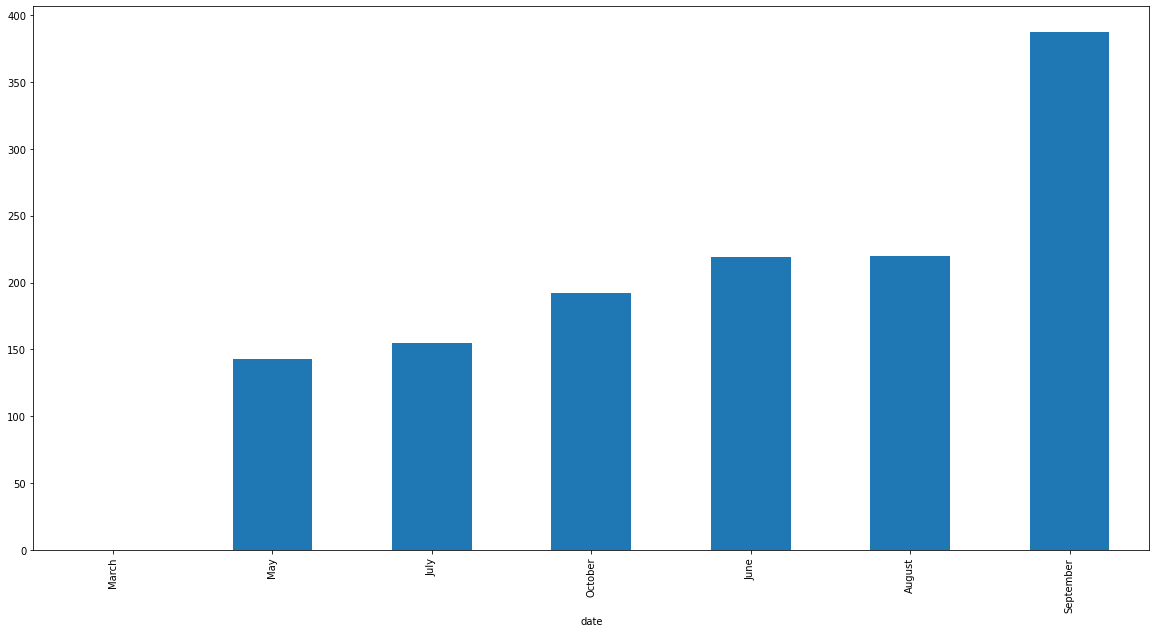

In [13]:
month_orders = df.groupby(df['date'].dt.strftime('%B'))['total'].sum().sort_values()
month_orders.plot.bar(figsize = (20,10))